# Data Visualization

## Requirements

In [1]:
# Necessary libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Data Loading

In [2]:
# Prefix to identify the dataset
prefix = "e2e_test3"
dataset_train_path = f"./csv/data/{prefix}_fixed_train_data.csv"

# Load the dataset
raw_dataset = pd.read_csv(dataset_train_path)

# Display the dataset for 5 rows
display(raw_dataset.head())

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y,screen_height,screen_width
0,506.971497,282.207611,406.131836,278.658783,100,100,864,1536
1,518.564636,280.534271,412.582733,279.688538,100,100,864,1536
2,524.403320,282.937195,417.401550,282.717865,100,100,864,1536
3,530.841187,287.072388,422.359680,283.891907,100,100,864,1536
4,534.370300,287.437531,426.682861,285.813660,100,100,864,1536


## Gaze Path Visualization

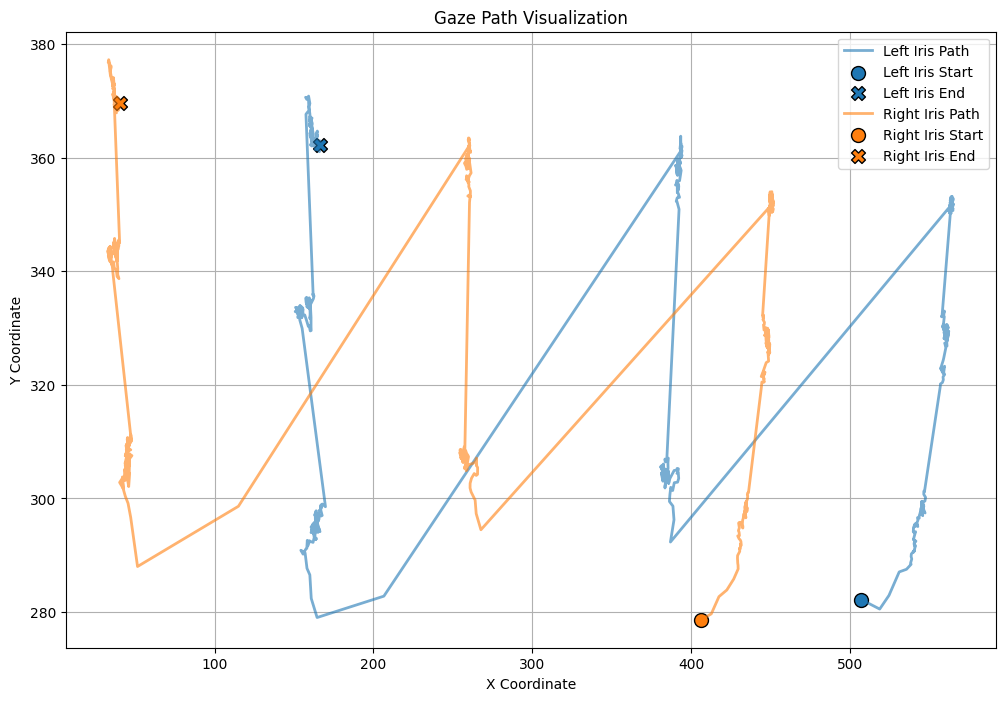

In [3]:
plt.figure(figsize=(12, 8))

# Plotting left iris path
plt.plot(
    raw_dataset["left_iris_x"],
    raw_dataset["left_iris_y"],
    color="#1f77b4",
    label="Left Iris Path",
    alpha=0.6,
    linewidth=2,
)
plt.scatter(
    raw_dataset["left_iris_x"].iloc[0],
    raw_dataset["left_iris_y"].iloc[0],
    color="#1f77b4",
    edgecolors="k",
    marker="o",
    s=100,
    label="Left Iris Start",
)
plt.scatter(
    raw_dataset["left_iris_x"].iloc[-1],
    raw_dataset["left_iris_y"].iloc[-1],
    color="#1f77b4",
    edgecolors="k",
    marker="X",
    s=100,
    label="Left Iris End",
)

# Plotting right iris path
plt.plot(
    raw_dataset["right_iris_x"],
    raw_dataset["right_iris_y"],
    color="#ff7f0e",
    label="Right Iris Path",
    alpha=0.6,
    linewidth=2,
)
plt.scatter(
    raw_dataset["right_iris_x"].iloc[0],
    raw_dataset["right_iris_y"].iloc[0],
    color="#ff7f0e",
    edgecolors="k",
    marker="o",
    s=100,
    label="Right Iris Start",
)
plt.scatter(
    raw_dataset["right_iris_x"].iloc[-1],
    raw_dataset["right_iris_y"].iloc[-1],
    color="#ff7f0e",
    edgecolors="k",
    marker="X",
    s=100,
    label="Right Iris End",
)

# Adding title and labels
plt.title("Gaze Path Visualization")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()

# Adding grid
plt.grid(True)

# Show plot
plt.show()

## Heatmap Visualization

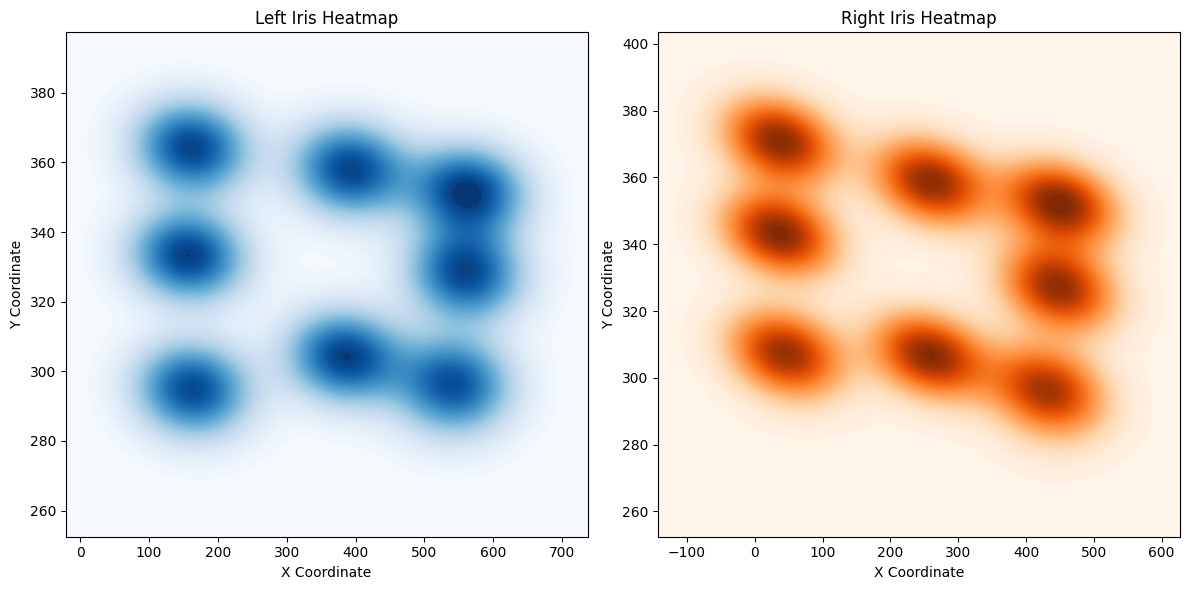

In [4]:
# Create separate heatmaps for left and right iris
plt.figure(figsize=(12, 6))

# Left iris heatmap
plt.subplot(1, 2, 1)
sns.kdeplot(
    x=raw_dataset["left_iris_x"],
    y=raw_dataset["left_iris_y"],
    cmap="Blues",
    fill=True,
    thresh=0,
    levels=100,
)

# Adding title and labels
plt.title("Left Iris Heatmap")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Right iris heatmap
plt.subplot(1, 2, 2)
sns.kdeplot(
    x=raw_dataset["right_iris_x"],
    y=raw_dataset["right_iris_y"],
    cmap="Oranges",
    fill=True,
    thresh=0,
    levels=100,
)

# Adding title and labels
plt.title("Right Iris Heatmap")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Show plot
plt.tight_layout()
plt.show()

## Eye Movement Visualization

### Left Eye Movement Visualization

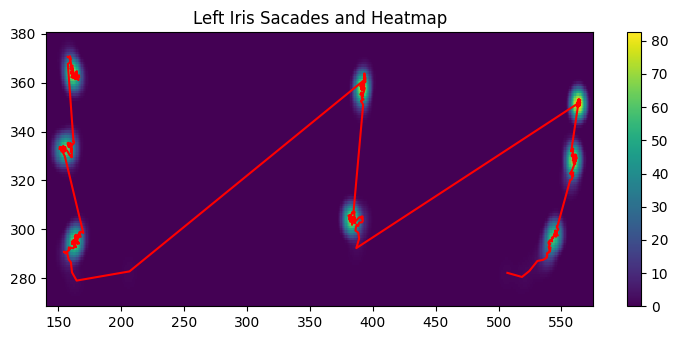

In [5]:
# Plot settings
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# x and y values
x = raw_dataset["left_iris_x"]
y = raw_dataset["left_iris_y"]

# Grid settings
grid_size = 1
h = 10

# Get the min and max values of x and y
x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)

# Create a grid
x_grid = np.arange(x_min - h, x_max + h, grid_size)
y_grid = np.arange(y_min - h, y_max + h, grid_size)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Calculate the center of each grid cell
xc = x_mesh + (grid_size / 2)
yc = y_mesh + (grid_size / 2)


def kde_quartic(d, h):
    """
    Calculate the quartic kernel density estimate (KDE) for a given distance and bandwidth.

    Args:
        - d (float): The distance.
        - h (float): The bandwidth.

    Returns:
        float: The quartic KDE value.
    """
    dn = d / h
    P = (15 / 16) * (1 - dn**2) ** 2

    return P


# Intensity list
intensity_list = []

for j in range(len(xc)):
    # List to store the intensity values for each row
    intensity_row = []

    for k in range(len(xc[0])):
        # List to store the KDE values
        kde_value_list = []

        # Iterate over all the points
        for i in range(len(x)):
            # Calculate distance
            d = math.sqrt((xc[j][k] - x[i]) ** 2 + (yc[j][k] - y[i]) ** 2)

            if d <= h:
                p = kde_quartic(d, h)
            else:
                p = 0

            # Append the KDE value to the list
            kde_value_list.append(p)

        # Calculate the total intensity and append it to the row
        p_total = sum(kde_value_list)
        intensity_row.append(p_total)

    # Append the row to the intensity list
    intensity_list.append(intensity_row)


# Convert the intensity list to a numpy array
intensity = np.array(intensity_list)

# Plot the heatmap
plt.title("Left Iris Sacades and Heatmap")
plt.pcolormesh(x_mesh, y_mesh, intensity)
plt.plot(x, y, "r", linestyle="-")
plt.colorbar()

# Show the plot
plt.show()

### Right Eye Movement Visualization

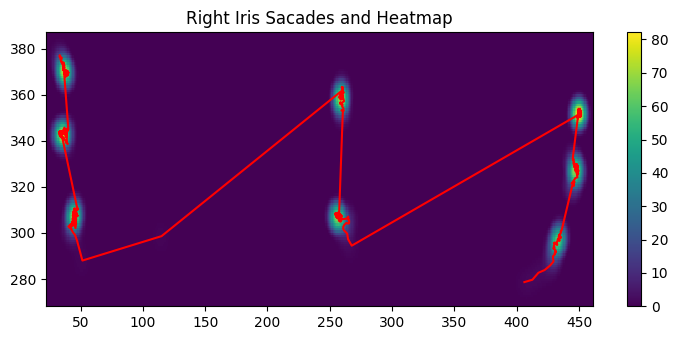

In [6]:
# Plot settings
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# x and y values
x = raw_dataset["right_iris_x"]
y = raw_dataset["right_iris_y"]

# Grid settings
grid_size = 1
h = 10

# Get the min and max values of x and y
x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)

# Create a grid
x_grid = np.arange(x_min - h, x_max + h, grid_size)
y_grid = np.arange(y_min - h, y_max + h, grid_size)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Calculate the center of each grid cell
xc = x_mesh + (grid_size / 2)
yc = y_mesh + (grid_size / 2)


def kde_quartic(d, h):
    """
    Calculate the quartic kernel density estimate (KDE) for a given distance and bandwidth.

    Args:
        - d (float): The distance.
        - h (float): The bandwidth.

    Returns:
        float: The quartic KDE value.
    """
    dn = d / h
    P = (15 / 16) * (1 - dn**2) ** 2

    return P


# Intensity list
intensity_list = []

for j in range(len(xc)):
    # List to store the intensity values for each row
    intensity_row = []

    for k in range(len(xc[0])):
        # List to store the KDE values
        kde_value_list = []

        # Iterate over all the points
        for i in range(len(x)):
            # Calculate distance
            d = math.sqrt((xc[j][k] - x[i]) ** 2 + (yc[j][k] - y[i]) ** 2)

            if d <= h:
                p = kde_quartic(d, h)
            else:
                p = 0

            # Append the KDE value to the list
            kde_value_list.append(p)

        # Calculate the total intensity and append it to the row
        p_total = sum(kde_value_list)
        intensity_row.append(p_total)

    # Append the row to the intensity list
    intensity_list.append(intensity_row)


# Convert the intensity list to a numpy array
intensity = np.array(intensity_list)

# Plot the heatmap
plt.title("Right Iris Sacades and Heatmap")
plt.pcolormesh(x_mesh, y_mesh, intensity)
plt.plot(x, y, "r", linestyle="-")
plt.colorbar()

# Show the plot
plt.show()

## Scatter Plot Visualization

### Left Eye Scatter Plot Visualization

In [7]:
# Create a scatter plot
fig = go.Figure(
    data=go.Scatter(
        x=raw_dataset["left_iris_x"],
        y=raw_dataset["left_iris_y"],
        mode="markers",
        marker=dict(color="blue", size=5, opacity=0.7),
    )
)

# Set the layout
fig.update_layout(
    title="Left Iris Scatter Plot",
    xaxis=dict(title="left_iris_x"),
    yaxis=dict(title="left_iris_y"),
)

# Show the plot
fig.show()

### Right Eye Scatter Plot Visualization

In [8]:
# Create a scatter plot
fig = go.Figure(
    data=go.Scatter(
        x=raw_dataset["right_iris_x"],
        y=raw_dataset["right_iris_y"],
        mode="markers",
        marker=dict(color="orange", size=5, opacity=0.7),
    )
)

# Set the layout
fig.update_layout(
    title="Right Iris Scatter Plot",
    xaxis=dict(title="right_iris_x"),
    yaxis=dict(title="right_iris_y"),
)

# Show the plot
fig.show()

## Line Plot Visualization

In [9]:
# Plotly line plot for the left and right iris position
px.line(raw_dataset, y=["left_iris_x", "left_iris_y", "right_iris_x", "right_iris_y"], title="Left and Right Iris Position")